In [1]:
%matplotlib inline
import pandas as pd
from datetime import datetime
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from IPython.display import display, HTML

In [2]:
# READ FROM CSV
data = pd.read_csv("data/communities.csv")
print(data.values)

[['2005-01-01' 0 0 nan nan 0 0]
 ['2005-02-01' 0 0 nan nan 0 0]
 ['2005-03-01' 0 8 nan nan 0 8]
 ['2005-04-01' 0 1 nan nan 0 9]
 ['2005-05-01' 0 0 nan nan 0 9]
 ['2005-06-01' 0 0 nan nan 0 9]
 ['2005-07-01' 0 0 nan nan 0 9]
 ['2005-08-01' 78 39 nan nan 78 48]
 ['2005-09-01' 39 49 nan nan 117 97]
 ['2005-10-01' 15 32 nan nan 132 129]
 ['2005-11-01' 20 29 nan nan 152 158]
 ['2005-12-01' 41 86 nan nan 193 244]
 ['2006-01-01' 23 43 nan nan 216 287]
 ['2006-02-01' 44 117 nan nan 260 404]
 ['2006-03-01' 143 200 nan nan 403 604]
 ['2006-04-01' 131 170 nan nan 534 774]
 ['2006-05-01' 128 174 nan nan 662 948]
 ['2006-06-01' 176 220 nan nan 838 1168]
 ['2006-07-01' 248 263 nan nan 1086 1431]
 ['2006-08-01' 198 255 nan nan 1284 1686]
 ['2006-09-01' 260 262 nan nan 1544 1948]
 ['2006-10-01' 281 312 nan nan 1825 2260]
 ['2006-11-01' 231 279 nan nan 2056 2539]
 ['2006-12-01' 243 277 nan nan 2299 2816]
 ['2007-01-01' 286 375 nan nan 2585 3191]
 ['2007-02-01' 313 368 nan nan 2898 3559]
 ['2007-03-01' 

In [3]:
data.date = data.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
pd.options.display.max_rows = 20

In [4]:
# Elimina righe senza valore e reindicizza
data = data[data.thing_user.notnull()]
data = data.reset_index(drop=True)
display(data)

,date,instr_proj,instr_user,thing_proj,thing_user,cum_proj,cum_user
0,2008-10-01,718,1240,5.0,7.0,14374,18382
1,2008-11-01,678,1525,126.0,239.0,15052,19907
2,2008-12-01,818,1553,49.0,98.0,15870,21460
3,2009-01-01,964,1751,36.0,44.0,16834,23211
4,2009-02-01,760,1520,31.0,39.0,17594,24731
5,2009-03-01,865,2710,65.0,70.0,18459,27441
6,2009-04-01,1015,2634,98.0,66.0,19474,30075
7,2009-05-01,778,2183,93.0,106.0,20252,32258
8,2009-06-01,890,1601,78.0,107.0,21142,33859
9,2009-07-01,942,1485,68.0,83.0,22084,35344


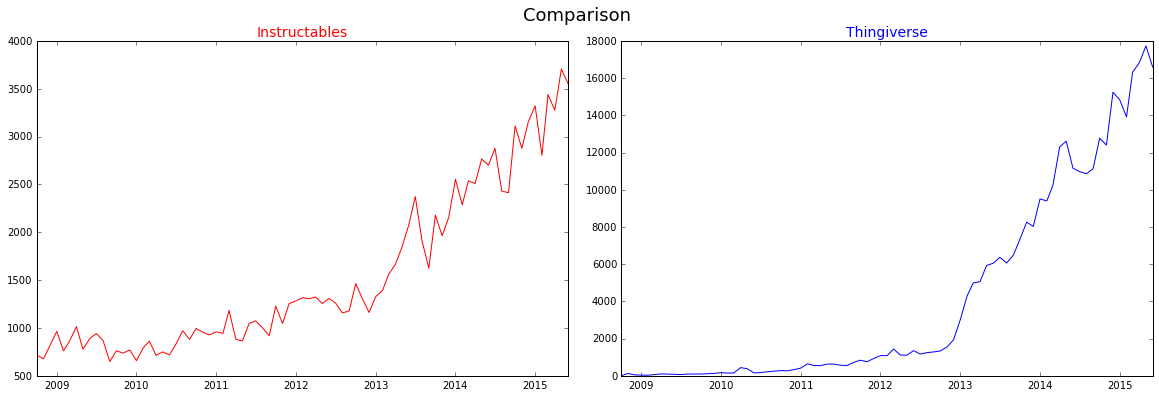

In [5]:
#Plotting projects
fig1 = plt.figure(figsize=(20, 6), dpi=300)
plt.suptitle('Comparison', size='18')
ax1 = fig1.add_subplot(121)
ax1.set_title('Instructables', color='r', size='14')
ax1.plot(data.date, data.instr_proj, 'r-')
ax2 = fig1.add_subplot(122)
ax2.set_title('Thingiverse', color='b', size='14')
ax2.plot(data.date, data.thing_proj, 'b-')
fig1.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

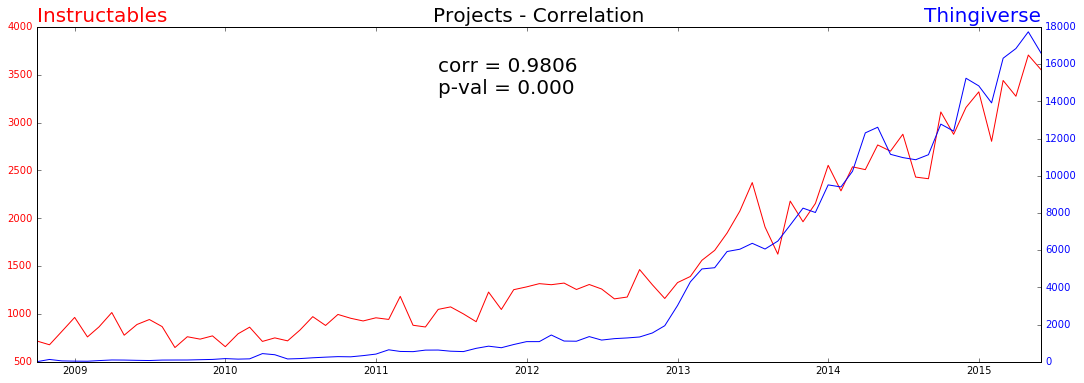

In [6]:
fig2 = plt.figure(num=None, figsize=(18, 6), dpi=300, facecolor='w', edgecolor=None)
plt.title("Instructables", color='r',size='20', loc='left')
plt.title("Thingiverse", color='b', size='20', loc='right')
plt.title("Projects - Correlation", size='20')
ax1 = fig2.add_subplot(111)
ax1.plot(data.date, data.instr_proj, 'r-')
for tl in ax1.get_yticklabels():
    tl.set_color('r')
ax2 = fig2.add_subplot(111)
ax2 = ax1.twinx()
ax2.plot(data.date, data.thing_proj, 'b-')
for tl in ax2.get_yticklabels():
    tl.set_color('b')

#Pearson calculation of project's distributions
proj_corr = pearsonr(data.instr_proj, data.thing_proj)
proj_rho = round(proj_corr[0],4)
proj_p = format(round(proj_corr[1],4), '.3f')
textx = data.date.values[round(len(data)*0.40)]
corr1 = fig2.add_subplot(111)
corr1 = ax1.twinx()#.twiny()
corr1.axes.get_yaxis().set_visible(False)
#ax2.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off', labeltop='off')
#plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05), )
#corr1.xticks([])
#corr1.yticks([])

corr1.text(textx, 0.8, "{} {}\n{} {}".format("corr =", proj_rho, "p-val =", proj_p), size='20')

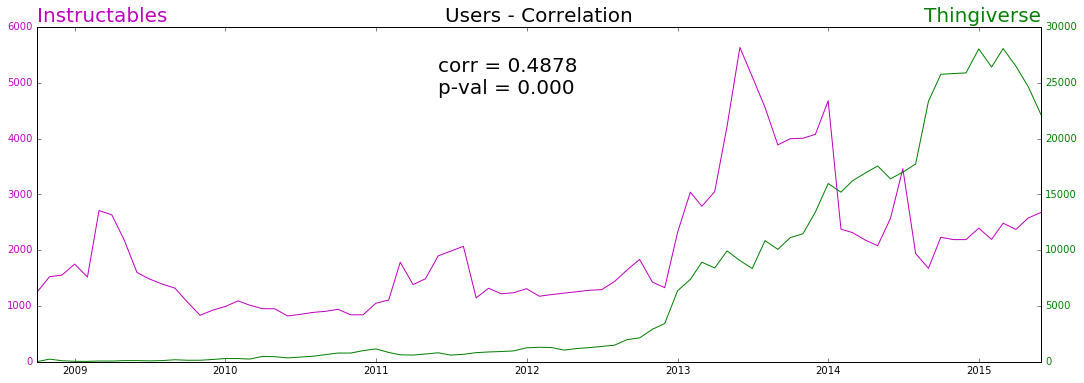

In [7]:
#Plotting users
fig3 = plt.figure(num=None, figsize=(18, 6), dpi=300, facecolor='w', edgecolor=None)
plt.title("Instructables", color='m',size='20', loc='left')
plt.title("Thingiverse", color='g', size='20', loc='right')
plt.title("Users - Correlation", size='20')
ax3 = fig3.add_subplot(111)
ax3.plot(data.date, data.instr_user, 'm-')
for tl in ax3.get_yticklabels():
    tl.set_color('m')

ax4 = fig3.add_subplot(111)
ax4 = ax3.twinx()
ax4.plot(data.date, data.thing_user, 'g-')
for tl in ax4.get_yticklabels():
    tl.set_color('g')

#Pearson calculation of user's distributions
user_corr = pearsonr(data.instr_user, data.thing_user)
user_rho = round(user_corr[0],4)
user_p = format(round(user_corr[1],4), '.3f')
corr2 = fig3.add_subplot(111)
corr2 = ax3.twinx()
corr2.axes.get_yaxis().set_visible(False)
corr2.text(textx, 0.8, "{} {}\n{} {}".format("corr =", user_rho, "p-val =", user_p), size='20')